In [25]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

Mengambil data dan menghapus kolom yang tidak relevan

In [2]:
df = pd.read_csv("DataBefore_Kelompok6.csv")
df.drop(columns=['Semester', 'Timestamp', 'Fakultas'], inplace=True)
df.head(10)

,Nama,Jenis Kelamin,Seberapa mudah Anda mengakses BINUSMAYA dari berbagai perangkat dan jaringan?,Seberapa puas Anda terhadap tampilan dan navigasi antarmuka BINUSMAYA?,Bagaimana penilaian Anda terhadap kecepatan dan kestabilan sistem BINUSMAYA saat digunakan?,Seberapa baik fitur-fitur seperti forum dan kalender membantu proses belajar Anda?,Seberapa puas Anda terhadap respons dan bantuan ketika mengalami kendala teknis?,Seberapa aman Anda merasa saat menggunakan BINUSMAYA dari segi perlindungan data pribadi?,Seberapa baik BINUSMAYA berjalan di berbagai browser atau sistem operasi Anda gunakan?,Seberapa besar BINUSMAYA membantu Anda memahami materi dan menyelesaikan tugas perkuliahan?,Seberapa puas Anda terhadap frekuensi dan kualitas pembaruan sistem BINUSMAYA?,"Secara keseluruhan, seberapa puas Anda terhadap BINUSMAYA?",Kendala teknis atau hambatan apa yang pernah Anda alami saat menggunakan BINUSMAYA?,"Menurut Anda, fitur apa di BINUSMAYA yang perlu diperbaiki atau dikembangkan lebih lanjut?",Bagaimana pengalaman Anda saat mencari bantuan atau dukungan teknis ketika mengalami kendala di BINUSMAYA?
0,Catherine Alyssa Rapito,Perempuan,3,5,3,5,3,4,4,4,4,4,"Tidak bisa login, Website lambat / error saat ...","Unggah dan lihat tugas, Konferensi video","Sulit menemukan informasi bantuan, Tidak tahu ..."
1,Steven Liementha,Laki-laki,4,4,4,4,4,3,4,4,4,4,Tidak bisa login,Konferensi video,Tidak tahu ke mana harus menghubungi
2,Sam,Laki-laki,5,4,4,4,2,3,3,4,5,4,"Website lambat / error saat jam sibuk, Notifik...","Forum diskusi, Kalender akademik",Cukup membantu tapi agak lambat
3,Kenneth,Laki-laki,4,4,4,4,4,4,4,4,4,4,"Website lambat / error saat jam sibuk, Kesulit...",Kalender akademik,Belum pernah mencoba
4,Philip,Laki-laki,4,4,3,4,4,4,4,3,4,4,"Tidak bisa login, Website lambat / error saat ...",Tampilan antarmuka (UI),Belum pernah mencoba
5,Arnesia,Perempuan,4,5,3,5,4,5,3,4,4,4,"Tidak bisa login, Website lambat / error saat ...",Suka bermasalah home screennya,Belum pernah mencoba
6,Caroline,Perempuan,2,2,2,2,2,4,2,3,3,2,"Tidak bisa login, Website lambat / error saat ...",UX,Belum pernah mencoba
7,Ribka Alexandra,Perempuan,5,5,5,5,5,5,5,5,5,5,Website lambat / error saat jam sibuk,"Kalender akademik, Unggah dan lihat tugas",Sangat mudah dan cepat
8,Dheovan Winata Alvian,Laki-laki,4,2,2,5,3,5,4,5,2,3,"Website lambat / error saat jam sibuk, Forum t...","Forum diskusi, Tampilan antarmuka (UI)",Belum pernah mencoba
9,Yolanda Salwaa,Perempuan,3,3,3,3,3,4,3,4,4,4,"Tidak bisa login, Website lambat / error saat ...","Kalender akademik, Unggah dan lihat tugas",Cukup membantu tapi agak lambat


Mengganti nama kolom

In [3]:
column_mapping = {
    "Seberapa mudah Anda mengakses BINUSMAYA dari berbagai perangkat dan jaringan?": "akses",
    "Seberapa puas Anda terhadap tampilan dan navigasi antarmuka BINUSMAYA?": "ui",
    "Bagaimana penilaian Anda terhadap kecepatan dan kestabilan sistem BINUSMAYA saat digunakan?": "perform",
    "Seberapa baik fitur-fitur seperti forum dan kalender membantu proses belajar Anda?": "fitur_belajar",
    "Seberapa puas Anda terhadap respons dan bantuan ketika mengalami kendala teknis?": "bantuan",
    "Seberapa aman Anda merasa saat menggunakan BINUSMAYA dari segi perlindungan data pribadi?": "keamanan",
    "Seberapa baik BINUSMAYA berjalan di berbagai browser atau sistem operasi Anda gunakan?": "kompatibilitas",
    "Seberapa besar BINUSMAYA membantu Anda memahami materi dan menyelesaikan tugas perkuliahan?": "dukungan",
    "Seberapa puas Anda terhadap frekuensi dan kualitas pembaruan sistem BINUSMAYA?": "update",
    "Secara keseluruhan, seberapa puas Anda terhadap BINUSMAYA?": "puas_total",
    "Kendala teknis atau hambatan apa yang pernah Anda alami saat menggunakan BINUSMAYA?  ": "kendala",
    "Menurut Anda, fitur apa di BINUSMAYA yang perlu diperbaiki atau dikembangkan lebih lanjut?  ": "fitur_perbaikan",
    "Bagaimana pengalaman Anda saat mencari bantuan atau dukungan teknis ketika mengalami kendala di BINUSMAYA?  ": "pengalaman_bantuan"
}

df.rename(columns=column_mapping, inplace=True)
df.head(10)

,Nama,Jenis Kelamin,akses,ui,perform,fitur_belajar,bantuan,keamanan,kompatibilitas,dukungan,update,puas_total,kendala,fitur_perbaikan,pengalaman_bantuan
0,Catherine Alyssa Rapito,Perempuan,3,5,3,5,3,4,4,4,4,4,"Tidak bisa login, Website lambat / error saat ...","Unggah dan lihat tugas, Konferensi video","Sulit menemukan informasi bantuan, Tidak tahu ..."
1,Steven Liementha,Laki-laki,4,4,4,4,4,3,4,4,4,4,Tidak bisa login,Konferensi video,Tidak tahu ke mana harus menghubungi
2,Sam,Laki-laki,5,4,4,4,2,3,3,4,5,4,"Website lambat / error saat jam sibuk, Notifik...","Forum diskusi, Kalender akademik",Cukup membantu tapi agak lambat
3,Kenneth,Laki-laki,4,4,4,4,4,4,4,4,4,4,"Website lambat / error saat jam sibuk, Kesulit...",Kalender akademik,Belum pernah mencoba
4,Philip,Laki-laki,4,4,3,4,4,4,4,3,4,4,"Tidak bisa login, Website lambat / error saat ...",Tampilan antarmuka (UI),Belum pernah mencoba
5,Arnesia,Perempuan,4,5,3,5,4,5,3,4,4,4,"Tidak bisa login, Website lambat / error saat ...",Suka bermasalah home screennya,Belum pernah mencoba
6,Caroline,Perempuan,2,2,2,2,2,4,2,3,3,2,"Tidak bisa login, Website lambat / error saat ...",UX,Belum pernah mencoba
7,Ribka Alexandra,Perempuan,5,5,5,5,5,5,5,5,5,5,Website lambat / error saat jam sibuk,"Kalender akademik, Unggah dan lihat tugas",Sangat mudah dan cepat
8,Dheovan Winata Alvian,Laki-laki,4,2,2,5,3,5,4,5,2,3,"Website lambat / error saat jam sibuk, Forum t...","Forum diskusi, Tampilan antarmuka (UI)",Belum pernah mencoba
9,Yolanda Salwaa,Perempuan,3,3,3,3,3,4,3,4,4,4,"Tidak bisa login, Website lambat / error saat ...","Kalender akademik, Unggah dan lihat tugas",Cukup membantu tapi agak lambat


Memeriksa tipe data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nama                99 non-null     object
 1   Jenis Kelamin       99 non-null     object
 2   akses               99 non-null     int64 
 3   ui                  99 non-null     int64 
 4   perform             99 non-null     int64 
 5   fitur_belajar       99 non-null     int64 
 6   bantuan             99 non-null     int64 
 7   keamanan            99 non-null     int64 
 8   kompatibilitas      99 non-null     int64 
 9   dukungan            99 non-null     int64 
 10  update              99 non-null     int64 
 11  puas_total          99 non-null     int64 
 12  kendala             99 non-null     object
 13  fitur_perbaikan     99 non-null     object
 14  pengalaman_bantuan  98 non-null     object
dtypes: int64(10), object(5)
memory usage: 11.7+ KB


Seluruh tipe data telah sesuai. Teridentifikasi pula adanya satu nilai hilang (missing value) pada kolom 'pengalaman_bantuan', namun demikian, kondisi tersebut dianggap wajar untuk kolom yang bersangkutan sehingga tidak dilakukan penanganan lebih lanjut

Verifikasi terhadap potensi adanya responden yang mengisi kuesioner lebih dari satu kali

In [5]:
df['Nama'].duplicated().sum()

0

Hasil analisis menunjukkan tidak terdapat responden yang mengisi kuesioner lebih dari satu kali. Oleh karena itu, kolom 'Nama' dan 'Jenis Kelamin' dapat dihilangkan karena dianggap tidak memberikan pengaruh terhadap analisis. Selanjutnya, dilakukan pemisahan kolom menjadi dua kelompok berdasarkan tipe datanya, yaitu numerik dan string

In [6]:
df.drop(columns=['Nama', 'Jenis Kelamin'], inplace=True)

cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['kendala', 'fitur_perbaikan', 'pengalaman_bantuan']
Numeric: ['akses', 'ui', 'perform', 'fitur_belajar', 'bantuan', 'keamanan', 'kompatibilitas', 'dukungan', 'update', 'puas_total']


Summary statistics data numerik

In [7]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
akses,99.0,3.606061,1.008314,1.0,3.0,4.0,4.0,5.0
ui,99.0,3.727273,0.890061,1.0,3.0,4.0,4.0,5.0
perform,99.0,2.818182,1.062953,1.0,2.0,3.0,3.5,5.0
fitur_belajar,99.0,4.000000,0.925820,1.0,4.0,4.0,5.0,5.0
bantuan,99.0,3.141414,1.133984,1.0,2.5,3.0,4.0,5.0
keamanan,99.0,3.595960,1.151035,1.0,3.0,4.0,4.0,5.0
kompatibilitas,99.0,3.434343,1.170746,1.0,3.0,4.0,4.0,5.0
dukungan,99.0,3.909091,0.904534,1.0,3.0,4.0,5.0,5.0
update,99.0,3.494949,1.063050,1.0,3.0,4.0,4.0,5.0
puas_total,99.0,3.565657,0.916533,1.0,3.0,4.0,4.0,5.0


Hasil statistik deskriptif menunjukkan bahwa sebagian besar aspek BINUSMAYA dinilai cukup positif oleh mahasiswa, dengan nilai median berada di skala 4. Aspek dengan penilaian tertinggi adalah fitur_belajar dan dukungan, sementara aspek perform (kecepatan dan kestabilan sistem) memiliki rata-rata terendah (2.82), menunjukkan ketidakpuasan yang paling menonjol. Variasi penilaian cukup besar terlihat pada aspek kompatibilitas dan keamanan, mengindikasikan pengalaman pengguna yang berbeda-beda. Secara keseluruhan, meskipun respons cenderung positif, performa sistem menjadi perhatian utama untuk perbaikan.

Check distribusi data numerik

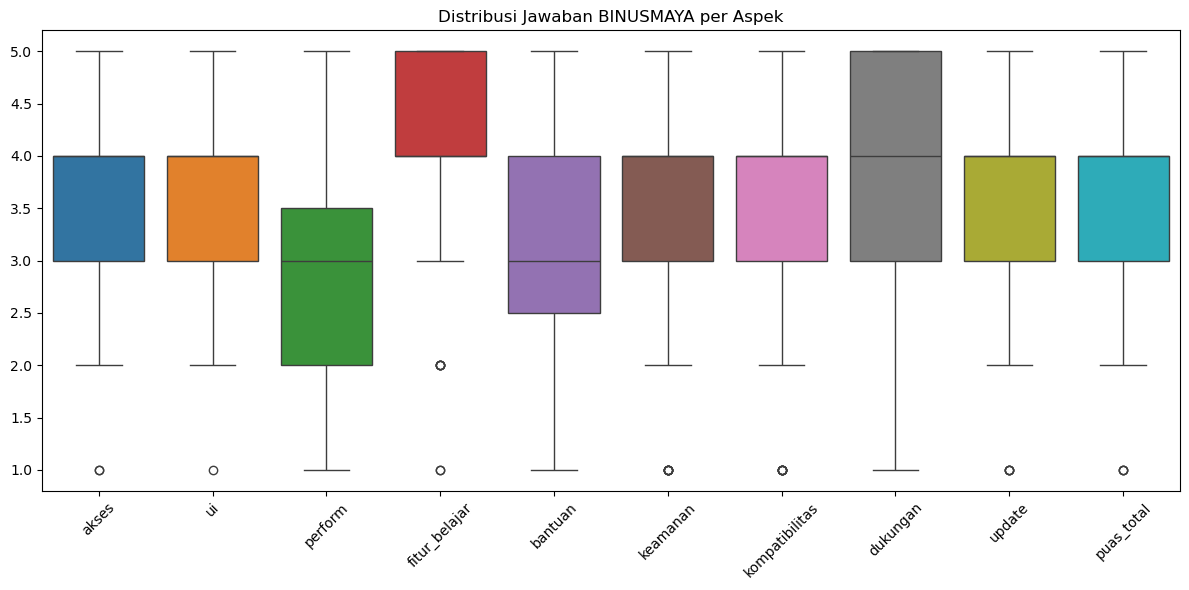

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Distribusi Jawaban BINUSMAYA per Aspek")
plt.tight_layout()
plt.show()

Hasil visualisasi boxplot menunjukkan bahwa sebagian besar aspek BINUSMAYA mendapatkan penilaian cukup positif, dengan median skor berada di angka 3 atau 4. Aspek yang paling menonjol secara positif adalah fitur_belajar dan dukungan, yang menunjukkan persepsi baik dari mahasiswa terhadap fitur pembelajaran dan bantuan yang tersedia. Sebaliknya, aspek perform (kecepatan dan kestabilan sistem) memiliki median paling rendah dan penyebaran nilai yang lebih lebar, termasuk banyak nilai rendah dan outlier. Hal ini mengindikasikan bahwa ketidakstabilan dan kecepatan sistem menjadi sumber ketidakpuasan yang paling dominan. Selain itu, aspek seperti bantuan, kompatibilitas, dan keamanan juga menunjukkan persebaran penilaian yang cukup luas, menandakan perbedaan pengalaman yang signifikan antar pengguna.

Analisis terhadap persentase jawaban pada masing-masing kolom numerik

In [9]:
for i, col in enumerate(num_cols):
    print(df[col].value_counts().sort_index())

akses
1     2
2    13
3    26
4    39
5    19
Name: count, dtype: int64
ui
1     1
2     9
3    23
4    49
5    17
Name: count, dtype: int64
perform
1    11
2    27
3    36
4    19
5     6
Name: count, dtype: int64
fitur_belajar
1     2
2     5
3    15
4    46
5    31
Name: count, dtype: int64
bantuan
1    10
2    15
3    37
4    25
5    12
Name: count, dtype: int64
keamanan
1     7
2     9
3    24
4    36
5    23
Name: count, dtype: int64
kompatibilitas
1     7
2    16
3    21
4    37
5    18
Name: count, dtype: int64
dukungan
1     1
2     6
3    21
4    44
5    27
Name: count, dtype: int64
update
1     4
2    12
3    33
4    31
5    19
Name: count, dtype: int64
puas_total
1     3
2     8
3    30
4    46
5    12
Name: count, dtype: int64


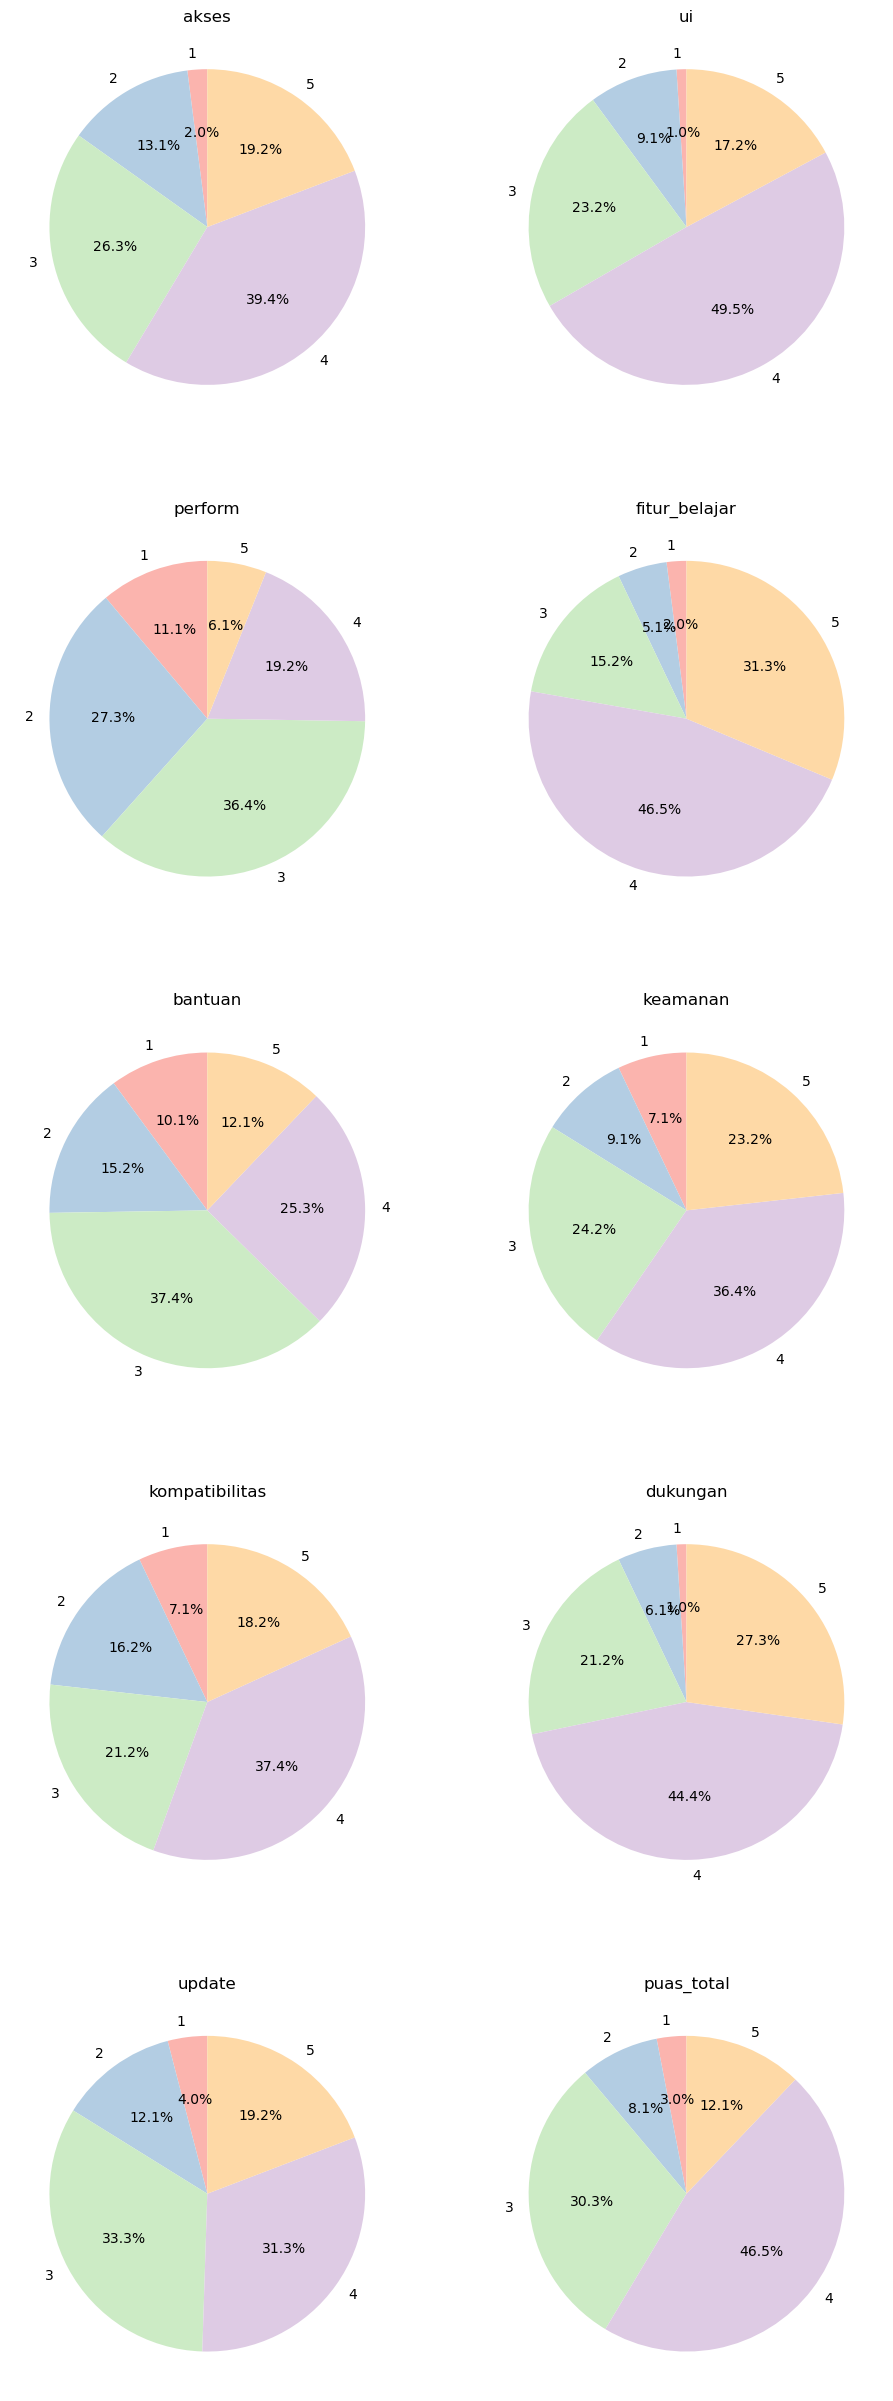

In [33]:
n_cols = len(num_cols)
n_rows = (n_cols + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(10, 5*n_rows))
fig.tight_layout(pad=3.0)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    counts = df[col].value_counts().sort_index()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', 
               startangle=90, colors=plt.cm.Pastel1.colors)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.show()

Visualisasi data memperlihatkan distribusi respons mahasiswa terhadap sepuluh aspek evaluasi platform BINUSMAYA dan kepuasan total, menggunakan pie chart untuk memproyeksikan proporsi pilihan pada skala Likert (1-5) dan jumlah responden per skala. Distribusi nilai cenderung terpusat pada skala 3 dan 4 untuk sebagian besar aspek, mengindikasikan penilaian moderat hingga positif. Aspek 'fitur_belajar' dan 'dukungan' menunjukkan dominasi nilai 4 dan 5, sedangkan 'perform' memperlihatkan proporsi signifikan nilai 1 dan 2. Kepuasan total terdistribusi cenderung ke skala 4, namun dengan variasi.

Analisis terhadap korelasi antar data numerik

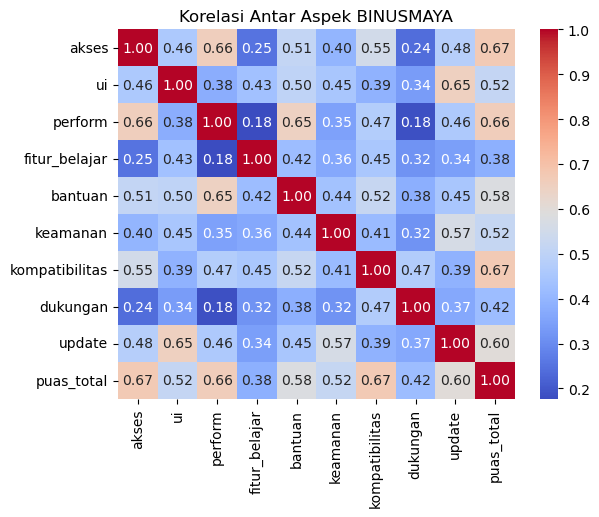

In [11]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Aspek BINUSMAYA")
plt.show()

Visualisasi korelasi ini menunjukkan bagaimana hubungan antar berbagai aspek BINUSMAYA, serta bagaimana aspek-aspek tersebut berhubungan dengan kepuasan mahasiswa secara keseluruhan. Kekuatan dan arah hubungan ini ditampilkan dengan warna yang berbeda, dan nilai korelasi (angka yang menunjukkan seberapa kuat hubungan) dicantumkan di setiap kotak.

Dari visualisasi ini, terlihat bahwa ada tiga aspek yang punya hubungan kuat dengan kepuasan total mahasiswa ('puas_total'):
- kompatibilitas (0.67)
- akses (0.67)
- perform (0.66)

Angka-angka ini berarti bahwa jika mahasiswa merasa positif tentang kompatibilitas (misalnya, BINUSMAYA mudah digunakan di berbagai perangkat), akses (mudah diakses), dan performa (cepat dan stabil), mereka cenderung lebih puas secara keseluruhan dengan BINUSMAYA.

Di sisi lain, aspek seperti dukungan dan fitur_belajar punya hubungan yang lebih lemah dengan kepuasan total, meskipun penilaian untuk aspek-aspek ini cukup tinggi. Ini menunjukkan bahwa aspek-aspek teknis (seperti performa) mungkin lebih penting bagi kepuasan mahasiswa daripada aspek-aspek yang berkaitan dengan bantuan atau fitur pembelajaran tambahan.

Berdasarkan analisis distribusi data dan korelasi antar variabel, ditetapkan lima kolom berikut sebagai variabel utama untuk analisis lebih lanjut: 'perform', 'akses', 'kompatibilitas', 'keamanan', dan 'update'.

In [12]:
main_cols = ['perform', 'akses', 'kompatibilitas', 'keamanan', 'update']

Check validitas data

In [13]:
validity = {}
for col in main_cols:
    other_cols = df.drop(columns=[col]).select_dtypes(include='number')
    total = other_cols.sum(axis=1)
    correlation = df[col].corr(total)
    validity[col] = correlation

validity_result = pd.DataFrame.from_dict(validity, orient='index', columns=['Corrected Item-Total Correlation'])
print(validity_result)

                Corrected Item-Total Correlation
perform                                 0.625686
akses                                   0.664221
kompatibilitas                          0.674824
keamanan                                0.587064
update                                  0.668274


Dalam uji validitas ini, pendekatan yang digunakan adalah Corrected Item-Total Correlation, yaitu metode yang mengukur seberapa besar korelasi antara satu item (variabel) dengan total skor dari semua item lainnya, tanpa menyertakan item itu sendiri dalam perhitungan total. Dalam Corrected Item-Total Correlation, jika nilainya ≥ 0.3, maka kolom tersebut valid. Dari hasil tersebut, dapat terlihat bahwa kelima variabel memiliki validitas internal yang baik, yang berarti mereka konsisten dengan keseluruhan konstruk persepsi/penilaian terhadap BINUSMAYA dan dapat digunakan secara sah sebagai bagian dari komposit atau konstruk "kepuasan mahasiswa".

Selanjutnya, akan dilakukan verifikasi terhadap reliabilitas data

In [14]:
cb_alpha = pg.cronbach_alpha(data=df[num_cols])
print(f"Cronbach Alpha: {cb_alpha[0]}")

Cronbach Alpha: 0.8900559689503224


Koefisien Cronbach's Alpha yang diperoleh adalah 0.89.

Karena nilai Cronbach's Alpha melebihi 0.5, maka dapat disimpulkan bahwa kelima variabel menunjukkan konsistensi internal yang tinggi. Hal ini mengindikasikan bahwa variabel-variabel tersebut secara konsisten mengukur konstruk yang sama, yaitu pengalaman dan kepuasan mahasiswa terhadap BINUSMAYA dari aspek teknis.

Selanjutnya, akan dilakukan pemeriksaan terhadap bias respons pada salah satu kolom, yaitu 'perform'

In [15]:
tgt_col = 'perform'

other_cols = [col for col in main_cols if col != tgt_col]
true_value_mean = df[other_cols].mean(axis=1).mean()
target_mean = df[tgt_col].mean()
response_bias = target_mean - true_value_mean

print(f"Mean '{tgt_col}': {target_mean:.3f}")
print(f"Corrected Item-Total Mean: {true_value_mean:.3f}")
print(f"Response Bias for '{tgt_col}': {response_bias:.3f}")

Mean 'perform': 2.818
Corrected Item-Total Mean: 3.533
Response Bias for 'perform': -0.715


Rata-rata skor untuk variabel 'perform' (kecepatan dan kestabilan) adalah 2.818, sementara rata-rata Corrected Item-Total (yang dianggap merepresentasikan nilai sebenarnya) adalah 3.533.

Nilai bias respons sebesar -0.715 mengindikasikan adanya bias negatif, yang berarti bahwa responden secara konsisten memberikan penilaian yang lebih rendah terhadap aspek performa BINUSMAYA dibandingkan aspek teknis lainnya (akses, kompatibilitas, keamanan, dan update).

Hal ini dapat diinterpretasikan sebagai berikut:
- Terdapat permasalahan aktual terkait kecepatan atau kestabilan sistem.
- Responden memiliki pengalaman negatif yang lebih menonjol terkait aspek ini.
- Item 'perform' (kecepatan dan kestabilan) memicu respons emosional atau evaluatif yang lebih kuat.

Sebagai kesimpulan, variabel 'perform' (kecepatan dan kestabilan) tidak hanya terbukti valid dan reliabel, tetapi juga layak diprioritaskan untuk perbaikan, mengingat skor yang konsisten lebih rendah dari ekspektasi keseluruhan aspek teknis.

Selanjutnya, akan dianalisis kolom-kolom yang berkaitan dengan hambatan yang dialami, fitur yang diusulkan untuk perbaikan atau pengembangan, serta pengalaman dengan dukungan teknis BINUSMAYA

In [16]:
def get_modus_multivalue_column(series):
    # Pisahkan berdasarkan koma, hilangkan spasi ekstra
    splitted = series.dropna().str.split(',')
    flat_list = [item.strip() for sublist in splitted for item in sublist if item.strip()]
    s = pd.Series(flat_list)
    return s.mode(), s.value_counts()

# Hitung untuk tiap kolom
for column in ['kendala', 'fitur_perbaikan', 'pengalaman_bantuan']:
    print(f"\n=== Modus kolom '{column}' ===")
    modus, frekuensi = get_modus_multivalue_column(df[column])
    print("Modus:")
    print(modus.to_string(index=False))
    print("\nTop 5 Frekuensi:")
    print(frekuensi.head(5))


=== Modus kolom 'kendala' ===
Modus:
Website lambat / error saat jam sibuk

Top 5 Frekuensi:
Website lambat / error saat jam sibuk                 86
Tidak bisa login                                      59
Notifikasi tidak muncul / telat                       47
Forum tidak bisa dibuka atau tidak tampil sempurna    34
Kesulitan mengakses materi atau tugas                 32
Name: count, dtype: int64

=== Modus kolom 'fitur_perbaikan' ===
Modus:
Unggah dan lihat tugas

Top 5 Frekuensi:
Unggah dan lihat tugas     51
Tampilan antarmuka (UI)    42
Kalender akademik          35
Konferensi video           32
Forum diskusi              32
Name: count, dtype: int64

=== Modus kolom 'pengalaman_bantuan' ===
Modus:
Belum pernah mencoba

Top 5 Frekuensi:
Belum pernah mencoba                    38
Cukup membantu tapi agak lambat         36
Tidak tahu ke mana harus menghubungi    22
Sulit menemukan informasi bantuan       20
Sangat mudah dan cepat                   9
Name: count, dtype: int64


Hasil analisis pada kolom 'kendala' menunjukkan bahwa modus jawaban adalah "Website lambat / error saat jam sibuk", dengan frekuensi tertinggi. Keluhan lain yang sering muncul meliputi "Tidak bisa login" dan "Notifikasi tidak muncul / telat". Temuan ini mengindikasikan bahwa isu utama yang dihadapi pengguna berkaitan dengan performa dan kestabilan sistem.

Pada kolom 'fitur_perbaikan', modus jawaban adalah "Unggah dan lihat tugas", yang juga merupakan fitur yang paling banyak diusulkan untuk perbaikan. Usulan perbaikan terbanyak berikutnya adalah terkait "Tampilan antarmuka (UI)", "Kalender akademik", "Konferensi video", dan "Forum diskusi". Hal ini menunjukkan adanya kebutuhan untuk optimalisasi fitur-fitur inti pembelajaran.

Analisis pada kolom 'pengalaman_bantuan' memperlihatkan bahwa modus jawaban adalah "Belum pernah mencoba", yang memiliki frekuensi tertinggi. Selain itu, respons lain yang cukup sering adalah "Cukup membantu tapi agak lambat", "Tidak tahu ke mana harus menghubungi", dan "Sulit menemukan informasi bantuan". Ini mengisyaratkan adanya permasalahan terkait visibilitas dan efektivitas sistem dukungan pengguna.

Secara keseluruhan, data kualitatif ini memperkuat temuan dari analisis kuantitatif sebelumnya, terutama terkait isu performa sistem.

Menyimpan DataFrame yang telah diproses ke file .csv

In [17]:
df.to_csv("DataAfter_Kelompok6.csv",index_label=False)